## 4.2.1

In [1]:
using SpecialFunctions
using Plots
function test()
    N = 100
    xs = range(0,10,length=N)
    for n=0:3
        Jn = besselj.(n,xs)
        Yn = bessely.(n,xs)
        plot!(xs,Jn,label="J$n(x)",ylims=(-1,1))
        plot!(xs,Yn,label="Y$n(x)",ylims=(-1,1))
    end
    savefig("JY.png")
end
test()

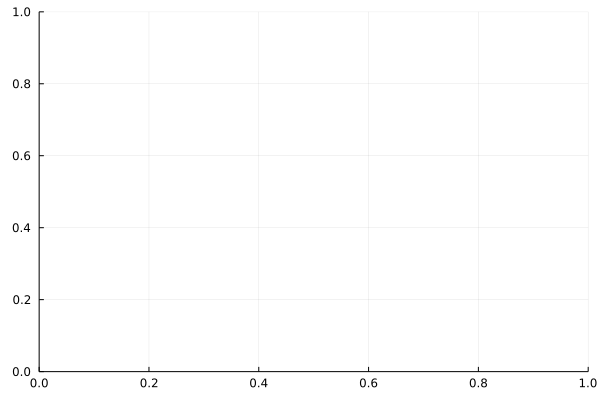

In [3]:
plot()

## 4.2.2

In [4]:
using FunctionZeros
function test2()
    R = 10
    N = 100
    Nene = 5
    n = 0
    Es = besselj_zero.(n,1:Nene).^2/R^2
    xs = range(0,10,length=N)
    for (i,E) in enumerate(Es)
        J0 = besselj.(0,xs*sqrt(E))
        plot!(xs,J0,label="$i-th eigenvalue",ylims=(-1,1))
    end
    savefig("J0.png")
end
test2()

In [7]:
using QuadGK
function orthoij(n,i,j)
    αi = besselj_zero(n,i)
    αj = besselj_zero(n,j)
    f(x) = x*besselj(0,αi*x)*besselj(0,αj*x)
    dij,err = quadgk(f,0,1)
    return dij
end

orthoij (generic function with 1 method)

In [9]:
function test3()
    i = 1
    j = 1
    n = 0
    dij = orthoij(n,i,j)
    αi = besselj_zero(n,i)
    println(dij[1]*2/besselj(1,αi)^2)
    i = 1
    j = 2
    dij = orthoij(n,i,j)
    αi = besselj_zero(n,i)
    println(dij[1]*2/besselj(1,αi)^2)
end
test3()

1.0000000000000002
-1.3590931929230456e-15


In [10]:
function calc_Vij(n,i,j,R,V)
    αi = besselj_zero(n,i)
    αj = besselj_zero(n,j)
    f(r) = r*V(R*r)*besselj(n,αi*r)*besselj(n,αj*r)
    v,err  = quadgk(f,0,1)
    Vij =v*2/besselj(n+1,αi)^2 
    return Vij
end

calc_Vij (generic function with 1 method)

In [12]:
function make_H(n,V,N,R)
    H  =zeros(Float64,N,N)
    for i=1:N
        αi = besselj_zero(n,i)
        for j=1:N
            if i==j
                H[i,j] += αi^2/R^2
            end
            Vij = calc_Vij(n,i,j,R,V)
            H[i,j] += Vij
        end
    end
    return H
end

make_H (generic function with 1 method)

In [13]:
function calc_psi(ci,n,r,R)
    N = length(ci)
    psi = 0
    for i=1:N
        αi = besselj_zero(n,i)
        psi += ci[i]*besselj(n,αi*r/R)
    end
    return psi
end

calc_psi (generic function with 1 method)

In [15]:
using LinearAlgebra
function test4()
    R = 10
    V(r) = 2*exp(-(r-R/4)^2/(R/20)^2)
    N = 30
    n  = 0
    H  =make_H(n,V,N,R)
    e,v = eigen(H)
    println(e)
    
    Nx = 100
    xs = range(0,10,length=Nx)
    i1 = 1
    i2 = 2
    psis1 = zero(xs)
    psis2 = zero(xs)
    for (j,x) in enumerate(xs)
        psis1[j] = calc_psi(v[:,i1],n,x,R)
        psis2[j] = calc_psi(v[:,i2],n,x,R)
    end
    plot(xs,psis1,label="$i1-th eigenvalue")
    plot!(xs,psis2,label="$i2-th eigenvalue")
    savefig("JV.png")
end
test4()

[0.15300249897678142, 0.5687623101608753, 0.8155811994164305, 1.4962338921937808, 2.5027463602668867, 3.534366986792485, 4.626522580364693, 6.088443135063618, 7.77766447629351, 9.583691385974992, 11.576569446550492, 13.805246800868051, 16.232974956088345, 18.844296646350042, 21.653224710386706, 24.664316519155616, 27.872695618393973, 31.27712636763495, 34.87911725550259, 38.67892287883274, 42.676054062849346, 46.870590295934555, 51.26275683634123, 55.85226176420367, 60.638921407755625, 65.62336589905819, 70.80596548399812, 76.18566016458148, 81.76183908261791, 87.53812514675273]


## 4.3.1

In [16]:
function timeevolv(ψ,N,Nt,Δt,H)
    ψs = zeros(ComplexF64,N,Nt)
    U = exp(-im*Δt*H)
    for i=1:Nt
        ψ = U*ψ
        ψs[:,i] = ψ
    end
    return ψs
end

timeevolv (generic function with 1 method)

In [17]:
function make_H(N,L,V)
    Δx = L/(N+1)
    H = zeros(Float64,N,N)
    for i=1:N
        x = i*Δx
        H[i,i] = V(x)
        j = i+1
        dij = -1/Δx^2
        if 1 ≤ j ≤ N
            H[i,j] += dij
        end
        
        j=i
        dij = 2/Δx^2
        if 1 ≤ j ≤ N
            H[i,j] += dij
        end
        
        j=i-1
        dij = -1/Δx^2
        if 1 ≤ j ≤ N
            H[i,j] += dij
        end
        
    end
    return H
end

make_H (generic function with 2 methods)

norm = 1.0
 93.617693 seconds (251 allocations: 5.257 GiB, 0.60% gc time)
1-th: norm = 0.9999999999998851
2-th: norm = 0.999999999999769
3-th: norm = 0.9999999999996527
4-th: norm = 0.999999999999537
5-th: norm = 0.9999999999994219
6-th: norm = 0.9999999999993069
7-th: norm = 0.9999999999991918
8-th: norm = 0.9999999999990761
9-th: norm = 0.9999999999989606
10-th: norm = 0.9999999999988445
11-th: norm = 0.9999999999987298
12-th: norm = 0.9999999999986162
13-th: norm = 0.9999999999985036
14-th: norm = 0.9999999999983918
15-th: norm = 0.99999999999828
16-th: norm = 0.9999999999981675
17-th: norm = 0.9999999999980553
18-th: norm = 0.9999999999979431
19-th: norm = 0.999999999997831
20-th: norm = 0.9999999999977184
21-th: norm = 0.9999999999976058
22-th: norm = 0.999999999997493
23-th: norm = 0.9999999999973798
24-th: norm = 0.9999999999972661
25-th: norm = 0.9999999999971528
26-th: norm = 0.9999999999970399
27-th: norm = 0.9999999999969273
28-th: norm = 0.9999999999968144
29-th: norm = 0.9

┌ Info: Saved animation to 
│   fn = /Users/yuki/git/YukiNagai/docs/src_ja/books/sample.gif
└ @ Plots /Users/yuki/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/Users/yuki/git/YukiNagai/docs/src_ja/books/sample.gif")
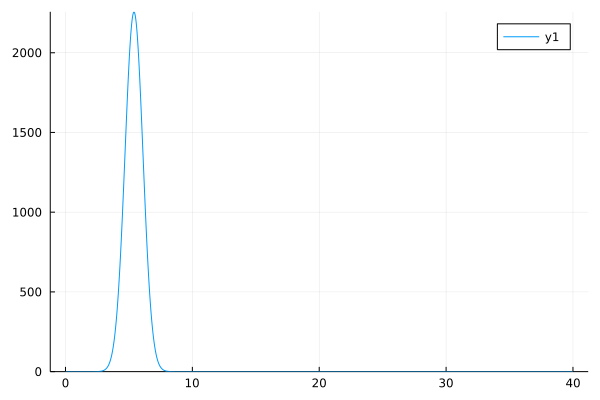

In [19]:
function timedep_simple()
    anim = Animation()
    N = 4000
    L = 40.0
    xs = range(0,L,length = N)
    σ =1 
    k0 = 10
    ψ0 = zeros(ComplexF64,N)
    x0 = 5
    @. ψ0 = (π*σ^2)^(-1/4)*exp(-(xs-x0)^2/(2σ^2)+im*k0*(xs-x0))
    dx = (xs[2]-xs[1])/N
    V(x) = 0
    H  = make_H(N,L,V)
    Δt = 0.02
    
    Nt = 100
    c = sqrt(norm(ψ0)^2*dx)
    ψ = ψ0/c
    ψ2max = maximum(abs.(ψ).^2)
    println("norm = $(norm(ψ)^2*dx)")
    @time ψs = timeevolv(ψ,N,Nt,Δt,H)
    
    for i=1:Nt
        plt = plot(xs,abs.(ψs[:,i]).^2,ylims=(0,ψ2max))
        println("$i-th: norm = $(norm(ψs[:,i])^2*dx)")
        frame(anim,plt)
    end
    gif(anim,"sample.gif",fps = 30)
end
timedep_simple()

## 4.3.2

In [20]:
function make_H!(H,N,L,V)
    @. H = 0
    Δx = L/(N+1)
    for i=1:N
        x = i*Δx
        H[i,i] = V(x)
        
        j=i+1
        dij = -1/Δx^2
        if 1 ≤ j ≤ N
            H[i,j] += dij
        end
        
        j = i
        dij = 2/Δx^2
        if 1 ≤ j ≤ N
            H[i,j] += dij
        end
        
        j = i-1
        dij = -1/Δx^2
        if 1 ≤ j ≤ N
            H[i,j] += dij
        end
    end
    return
end

make_H! (generic function with 1 method)

In [22]:
N = 4000
L = 40.0
V(x) = 0
H  =zeros(Float64,N,N)
make_H!(H,N,L,V)
H

4000×4000 Matrix{Float64}:
  20010.0  -10005.0       0.0       0.0  …       0.0       0.0       0.0
 -10005.0   20010.0  -10005.0       0.0          0.0       0.0       0.0
      0.0  -10005.0   20010.0  -10005.0          0.0       0.0       0.0
      0.0       0.0  -10005.0   20010.0          0.0       0.0       0.0
      0.0       0.0       0.0  -10005.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0  …       0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0  …       0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      0.0       0.0       0.0       0.0          0.0       0.0       0.0
      ⋮                 

In [24]:
using SparseArrays
H = spzeros(Float64,N,N)
make_H!(H,N,L,V)
H

4000×4000 SparseMatrixCSC{Float64, Int64} with 11998 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦

In [53]:
using KrylovKit
function timeevolv(ψ,N,Nt,Δt,H::SparseMatrixCSC)
    ψs = zeros(ComplexF64,N,Nt)
    for i=1:Nt
        ψ,info = exponentiate(H,-im*Δt,ψ)
        ψs[:,i] = ψ
    end
    return ψs
end

timeevolv (generic function with 2 methods)

norm = 1.0
118.706355 seconds (410.50 k allocations: 10.645 GiB, 0.14% gc time)
1-th: norm = 1.0
2-th: norm = 1.0
3-th: norm = 1.0
4-th: norm = 1.0
5-th: norm = 1.0
6-th: norm = 1.0
7-th: norm = 1.0
8-th: norm = 1.0
9-th: norm = 1.0
10-th: norm = 1.0
11-th: norm = 0.9999999999999998
12-th: norm = 0.9999999999999998
13-th: norm = 0.9999999999999998
14-th: norm = 0.9999999999999998
15-th: norm = 0.9999999999999998
16-th: norm = 0.9999999999999998
17-th: norm = 0.9999999999999998
18-th: norm = 0.9999999999999998
19-th: norm = 0.9999999999999994
20-th: norm = 0.9999999999999994
21-th: norm = 0.9999999999999994
22-th: norm = 0.9999999999999994
23-th: norm = 0.9999999999999994
24-th: norm = 0.9999999999999994
25-th: norm = 0.9999999999999994
26-th: norm = 0.9999999999999994
27-th: norm = 0.9999999999999994
28-th: norm = 0.9999999999999994
29-th: norm = 0.999999999999999
30-th: norm = 0.9999999999999994
31-th: norm = 0.999999999999999
32-th: norm = 0.9999999999999994
33-th: norm = 0.999999999

┌ Info: Saved animation to 
│   fn = /Users/yuki/git/YukiNagai/docs/src_ja/books/sample.gif
└ @ Plots /Users/yuki/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/Users/yuki/git/YukiNagai/docs/src_ja/books/sample.gif")
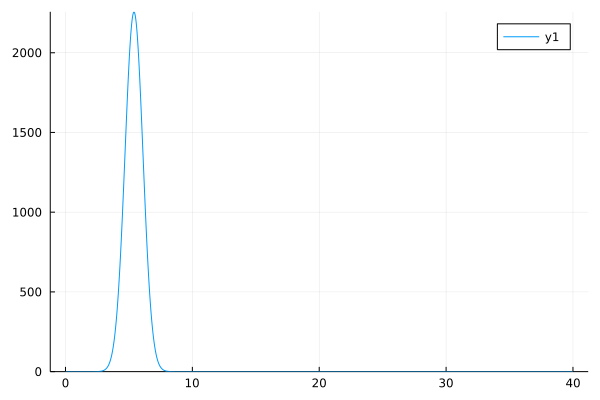

In [54]:
function timedep_simple_sparse()
    anim = Animation()
    N = 4000
    L = 40.0
    xs = range(0,L,length = N)
    σ =1 
    k0 = 10
    ψ0 = zeros(ComplexF64,N)
    x0 = 5
    @. ψ0 = (π*σ^2)^(-1/4)*exp(-(xs-x0)^2/(2σ^2)+im*k0*(xs-x0))
    dx = (xs[2]-xs[1])/N
    V(x) = 0
    H = spzeros(Float64,N,N)
    make_H!(H,N,L,V)
    Δt = 0.02
    
    Nt = 100
    c = sqrt(norm(ψ0)^2*dx)
    ψ = ψ0/c
    ψ2max = maximum(abs.(ψ).^2)
    println("norm = $(norm(ψ)^2*dx)")
    @time ψs = timeevolv(ψ,N,Nt,Δt,H)
    
    for i=1:Nt
        plt = plot(xs,abs.(ψs[:,i]).^2,ylims=(0,ψ2max))
        println("$i-th: norm = $(norm(ψs[:,i])^2*dx)")
        frame(anim,plt)
    end
    gif(anim,"sample.gif",fps = 30)
end
timedep_simple_sparse()

## 4.3.3

In [27]:
function timeevolv(ψ,N,Nt,Δt,H::SparseMatrixCSC)
    ψs = zeros(ComplexF64,N,Nt)
    for i=1:Nt
        ψ = ψ -im*Δt*H*ψ
        ψs[:,i] = ψ
    end
    return ψs
end

timeevolv (generic function with 2 methods)

norm = 1.0
  0.010026 seconds (602 allocations: 24.428 MiB)
1-th: norm = 5.1213624525737025
2-th: norm = 27.575206970861874
3-th: norm = 348.1444554115539
4-th: norm = 7.855257268661465e7
5-th: norm = 3.5638402281898234e13
6-th: norm = 1.7251092930082214e19
7-th: norm = 8.728311816426411e24
8-th: norm = 4.5604569686263375e30
9-th: norm = 2.4417251724675976e36
10-th: norm = 1.3326669808309041e42
11-th: norm = 7.387031912116308e47
12-th: norm = 4.14721009330746e53
13-th: norm = 2.3533284236792184e59
14-th: norm = 1.3475784832508186e65
15-th: norm = 7.77715416676372e70
16-th: norm = 4.5189765699631704e76
17-th: norm = 2.6415026251100278e82
18-th: norm = 1.5522257428687052e88
19-th: norm = 9.164351544849978e93
20-th: norm = 5.433510485334144e99
21-th: norm = 3.2337854247899905e105
22-th: norm = 1.931252730414699e111
23-th: norm = 1.156991873432212e117
24-th: norm = 6.951332511751543e122
25-th: norm = 4.1874537628769255e128
26-th: norm = 2.528633885296553e134
27-th: norm = 1.530368020799659

┌ Info: Saved animation to 
│   fn = /Users/yuki/git/YukiNagai/docs/src_ja/books/sample.gif
└ @ Plots /Users/yuki/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/Users/yuki/git/YukiNagai/docs/src_ja/books/sample.gif")
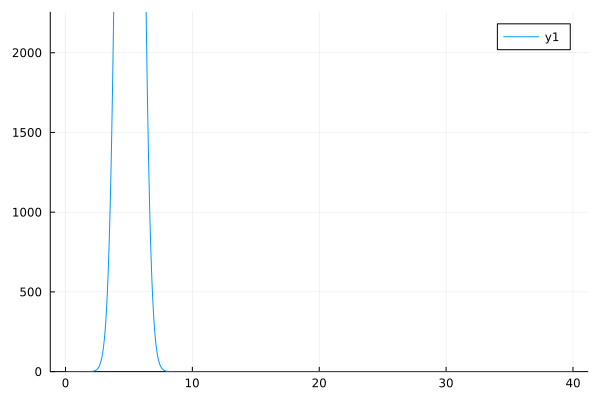

In [28]:
timedep_simple_sparse()

In [30]:
function timeevolv(ψ,N,Nt,Δt,H::SparseMatrixCSC)
    ψs = zeros(ComplexF64,N,Nt)
    A = im*Δt*H
    A += I(N)
    for i=1:Nt
        ψ = A \ ψ
        ψs[:,i] = ψ
    end
    return ψs
end

timeevolv (generic function with 2 methods)

norm = 1.0
  0.272448 seconds (20.91 k allocations: 512.673 MiB, 14.66% gc time, 1.80% compilation time)
1-th: norm = 0.2053760254330388
2-th: norm = 0.044379154875396
3-th: norm = 0.010091875052949608
4-th: norm = 0.0024151515176508557
5-th: norm = 0.0006081882900386152
6-th: norm = 0.00016110696402744527
7-th: norm = 4.4869476433149524e-5
8-th: norm = 1.3129284717537955e-5
9-th: norm = 4.032680123649041e-6
10-th: norm = 1.298788786683737e-6
11-th: norm = 4.380575548274083e-7
12-th: norm = 1.5451208596792977e-7
13-th: norm = 5.6907326893917974e-8
14-th: norm = 2.184944951528456e-8
15-th: norm = 8.730509455650681e-9
16-th: norm = 3.6241429180783168e-9
17-th: norm = 1.5601567497580463e-9
18-th: norm = 6.952797512789974e-10
19-th: norm = 3.2019906969593563e-10
20-th: norm = 1.5212735852081205e-10
21-th: norm = 7.44392702372395e-11
22-th: norm = 3.745530567183572e-11
23-th: norm = 1.935006312579471e-11
24-th: norm = 1.0249123944195704e-11
25-th: norm = 5.558324106631064e-12
26-th: norm = 

┌ Info: Saved animation to 
│   fn = /Users/yuki/git/YukiNagai/docs/src_ja/books/sample.gif
└ @ Plots /Users/yuki/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/Users/yuki/git/YukiNagai/docs/src_ja/books/sample.gif")
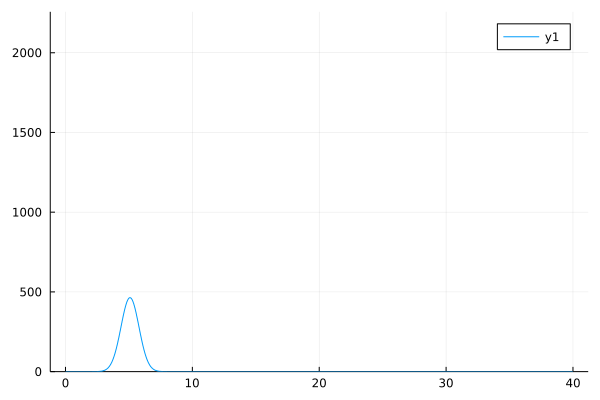

In [31]:
timedep_simple_sparse()

In [55]:
function timeevolv(ψ,N,Nt,Δt,H::SparseMatrixCSC)
    ψs = zeros(ComplexF64,N,Nt)
    A = (im*Δt/2)*H
    B = (-im*Δt/2)*H
    A += I(N)
    B += I(N)

    for i=1:Nt
        ψ = A \ (B*ψ)
        ψs[:,i] = ψ
    end
    return ψs
end

timeevolv (generic function with 2 methods)

norm = 1.0
  0.266138 seconds (8.49 k allocations: 518.878 MiB, 3.91% gc time)
1-th: norm = 0.9999999999999868
2-th: norm = 0.9999999999999724
3-th: norm = 0.9999999999999574
4-th: norm = 0.999999999999944
5-th: norm = 0.9999999999999307
6-th: norm = 0.9999999999999164
7-th: norm = 0.9999999999999024
8-th: norm = 0.999999999999888
9-th: norm = 0.9999999999998743
10-th: norm = 0.9999999999998607
11-th: norm = 0.9999999999998477
12-th: norm = 0.9999999999998351
13-th: norm = 0.999999999999821
14-th: norm = 0.999999999999807
15-th: norm = 0.999999999999794
16-th: norm = 0.9999999999997801
17-th: norm = 0.9999999999997679
18-th: norm = 0.9999999999997545
19-th: norm = 0.9999999999997415
20-th: norm = 0.9999999999997286
21-th: norm = 0.9999999999997143
22-th: norm = 0.9999999999997002
23-th: norm = 0.9999999999996855
24-th: norm = 0.99999999999967
25-th: norm = 0.9999999999996567
26-th: norm = 0.9999999999996434
27-th: norm = 0.9999999999996305
28-th: norm = 0.9999999999996172
29-th: norm =

┌ Info: Saved animation to 
│   fn = /Users/yuki/git/YukiNagai/docs/src_ja/books/sample.gif
└ @ Plots /Users/yuki/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/Users/yuki/git/YukiNagai/docs/src_ja/books/sample.gif")
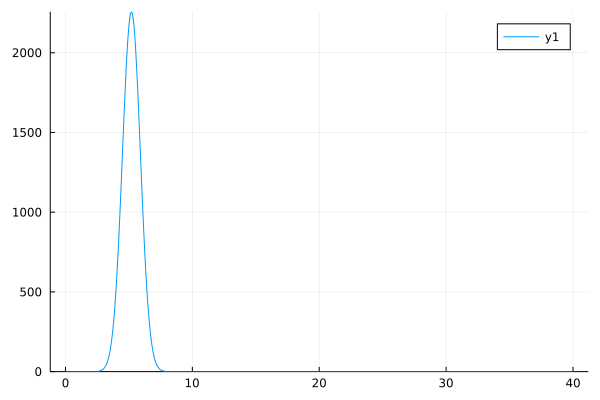

In [56]:
timedep_simple_sparse()

指数関数の結果より波が遅いのは、t=0.02の時のテイラー展開の1次の精度が悪いからです。

In [61]:
function timedep_simple()
    anim = Animation()
    N = 4000
    L = 40.0
    xs = range(0,L,length=N)
    σ = 1
    k0 = 10
    ψ0 = zeros(ComplexF64,N)
    x0 = 5
    @. ψ0 = (π*σ^2)^(-1/4)*exp(-(xs-x0)^2/(2σ^2)+ im*k0*(xs-x0))
    dx = (xs[2]-xs[1])/N
    x0 = L/2
    V0 = 10
    LV = 5
    function V(x)
        return ifelse(abs(x-x0) < LV/2,V0,0)
    end
    
    H = spzeros(Float64,N,N)
    make_H!(H,N,L,V)
    Δt = 0.02
    Nt = 100
    c = sqrt(norm(ψ0)^2*dx)
    ψ = ψ0/c
    ψ2max = maximum(abs.(ψ).^2)
    
    println("norm = $(norm(ψ)^2*dx)")
    @time ψs = timeevolv(ψ,N,Nt,Δt,H)
    
    for i=1:Nt
        println("energy = ", ψs[:,i]'*H*ψs[:,i]*dx)
        plt = plot(xs,abs.(ψs[:,i]).^2,ylims=(0,ψ2max),label="|psi|")
        plt = vline!([x0-LV/2,x0+LV/2],label = nothing)
        println("$i-th: norm = $(norm(ψs[:,i])^2*dx)")
        frame(anim,plt)
    end
    gif(anim,"simple_V0$(V0)LV$(LV).gif",fps = 30)
end
    

timedep_simple (generic function with 1 method)

norm = 1.0
  0.250104 seconds (8.49 k allocations: 518.878 MiB, 7.78% gc time)
energy = 100.51461177147576 + 1.3649508443971212e-14im
1-th: norm = 0.9999999999999994
energy = 100.5146117714758 - 4.1922020293855115e-15im
2-th: norm = 0.9999999999999994
energy = 100.51461177147564 + 4.25919383425942e-15im
3-th: norm = 0.9999999999999983
energy = 100.5146117714756 + 6.807512371443164e-15im
4-th: norm = 0.999999999999998
energy = 100.51461177147559 - 2.0022042795479485e-15im
5-th: norm = 0.9999999999999976
energy = 100.5146117714755 - 4.024411889906288e-16im
6-th: norm = 0.9999999999999961
energy = 100.51461177147539 + 1.9227749257546376e-14im
7-th: norm = 0.9999999999999958
energy = 100.51461177147522 - 1.8201183510456527e-14im
8-th: norm = 0.9999999999999939
energy = 100.51461177147509 - 3.56020563476554e-15im
9-th: norm = 0.9999999999999933
energy = 100.51461177147506 + 2.19988973090244e-15im
10-th: norm = 0.9999999999999929
energy = 100.51461177147502 + 3.894315379159171e-15im
11-th: n

energy = 100.51461177143507 - 2.183333117534411e-15im
97-th: norm = 0.9999999999995928
energy = 100.5146117714352 - 1.3245554246375428e-14im
98-th: norm = 0.9999999999995938
energy = 100.51461177143379 - 2.328888658703372e-15im
99-th: norm = 0.9999999999995806
energy = 100.51461177143247 - 1.4264443034558152e-14im
100-th: norm = 0.9999999999995676


┌ Info: Saved animation to 
│   fn = /Users/yuki/git/YukiNagai/docs/src_ja/books/simple_V010LV5.gif
└ @ Plots /Users/yuki/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/Users/yuki/git/YukiNagai/docs/src_ja/books/simple_V010LV5.gif")
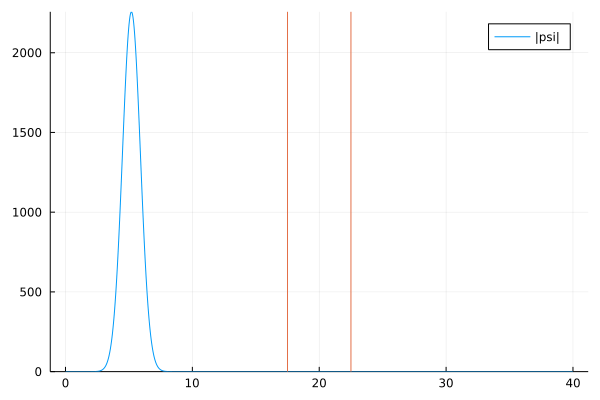

In [62]:
timedep_simple()

In [63]:
function timedep_simple()
    anim = Animation()
    N = 4000
    L = 40.0
    xs = range(0,L,length=N)
    σ = 1
    k0 = 10
    ψ0 = zeros(ComplexF64,N)
    x0 = 5
    @. ψ0 = (π*σ^2)^(-1/4)*exp(-(xs-x0)^2/(2σ^2)+ im*k0*(xs-x0))
    dx = (xs[2]-xs[1])/N
    x0 = L/2
    V0 = 120
    LV = 0.5
    function V(x)
        return ifelse(abs(x-x0) < LV/2,V0,0)
    end
    
    H = spzeros(Float64,N,N)
    make_H!(H,N,L,V)
    Δt = 0.02
    Nt = 100
    c = sqrt(norm(ψ0)^2*dx)
    ψ = ψ0/c
    ψ2max = maximum(abs.(ψ).^2)
    
    println("norm = $(norm(ψ)^2*dx)")
    @time ψs = timeevolv(ψ,N,Nt,Δt,H)
    
    for i=1:Nt
        println("energy = ", ψs[:,i]'*H*ψs[:,i]*dx)
        plt = plot(xs,abs.(ψs[:,i]).^2,ylims=(0,ψ2max),label="|psi|")
        plt = vline!([x0-LV/2,x0+LV/2],label = nothing)
        println("$i-th: norm = $(norm(ψs[:,i])^2*dx)")
        frame(anim,plt)
    end
    gif(anim,"simple_V0$(V0)LV$(LV).gif",fps = 30)
end
    

timedep_simple (generic function with 1 method)

norm = 1.0
  0.268268 seconds (8.49 k allocations: 518.878 MiB, 13.85% gc time)
energy = 100.51461177147449 - 1.2090808791860438e-14im
1-th: norm = 0.9999999999999868
energy = 100.51461177147307 - 6.0231520496723156e-15im
2-th: norm = 0.9999999999999724
energy = 100.51461177147151 - 1.6123644147962732e-14im
3-th: norm = 0.9999999999999574
energy = 100.51461177147017 - 2.412350434747899e-15im
4-th: norm = 0.999999999999944
energy = 100.51461177146889 + 6.638029736861214e-15im
5-th: norm = 0.999999999999931
energy = 100.51461177146744 + 8.71028517255894e-15im
6-th: norm = 0.9999999999999166
energy = 100.51461177146604 + 1.0402219858394174e-14im
7-th: norm = 0.9999999999999031
energy = 100.5146117714646 - 6.96435288907932e-15im
8-th: norm = 0.999999999999889
energy = 100.51461177146317 + 3.1344287876293138e-15im
9-th: norm = 0.999999999999875
energy = 100.51461177146184 + 3.8176210014285345e-15im
10-th: norm = 0.9999999999998617
energy = 100.51461177146052 - 1.9483188371484965e-15im
11-th

energy = 100.51461177137826 - 8.733332470137644e-15im
97-th: norm = 0.9999999999990269
energy = 100.51461177137718 + 3.4933329880550577e-15im
98-th: norm = 0.9999999999990135
energy = 100.51461177137604 - 3.92999961156194e-15im
99-th: norm = 0.9999999999990012
energy = 100.51461177137466 + 6.186110499680832e-16im
100-th: norm = 0.999999999998988


┌ Info: Saved animation to 
│   fn = /Users/yuki/git/YukiNagai/docs/src_ja/books/simple_V0120LV0.5.gif
└ @ Plots /Users/yuki/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/Users/yuki/git/YukiNagai/docs/src_ja/books/simple_V0120LV0.5.gif")
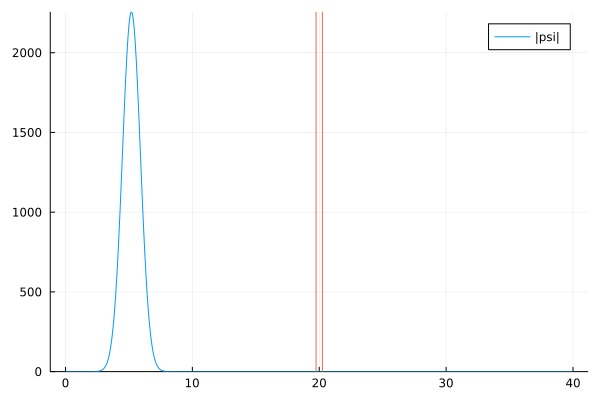

In [64]:
timedep_simple()